In [ ]:
import pandas as pd
import plotly.express as px
from fbprophet import Prophet

In [ ]:
import plotly.io as pio
pio.renderers.default ='colab'

In [ ]:
 #Initializing Plotly
 df= pd.read_csv("AMZN.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-13,185.104996,188.654007,183.565994,183.867996,183.867996,76918000
1,2021-07-14,185.442505,185.882996,183.041504,184.084000,184.084000,65932000
2,2021-07-15,184.710007,184.770004,181.046005,181.559998,181.559998,63706000
3,2021-07-16,181.665497,182.302994,178.522995,178.681503,178.681503,80874000
4,2021-07-19,176.628998,177.510498,174.957993,177.479507,177.479507,75692000
...,...,...,...,...,...,...,...
247,2022-07-06,113.209999,115.480003,112.010002,114.330002,114.330002,66958900
248,2022-07-07,113.849998,116.989998,113.489998,116.330002,116.330002,57872300
249,2022-07-08,114.599998,116.580002,113.690002,115.540001,115.540001,45658200
250,2022-07-11,114.080002,114.300003,110.870003,111.750000,111.750000,53487600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,154.352593,156.378750,152.067848,154.155133,154.155133,7.319492e+07
std,23.101821,22.742490,23.382339,23.037510,23.037510,3.193472e+07
min,102.750000,104.580002,101.260002,102.309998,102.309998,3.360600e+07
25%,144.750000,147.142872,140.738003,144.495506,144.495506,5.377300e+07
50%,163.794502,165.121750,161.859497,163.350754,163.350754,6.525300e+07
75%,170.101619,172.023007,168.506379,170.503502,170.503502,8.316700e+07
max,185.634506,188.654007,183.785995,184.990997,184.990997,2.726620e+08


In [ ]:
px.area(df, x="Date", y="Close")

In [ ]:
px.area(df, x="Date", y="Volume")

In [ ]:
px.box(df, y="Close")

In [ ]:
#Data Preperation
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-13,185.104996,188.654007,183.565994,183.867996,183.867996,76918000
1,2021-07-14,185.442505,185.882996,183.041504,184.084000,184.084000,65932000
2,2021-07-15,184.710007,184.770004,181.046005,181.559998,181.559998,63706000
3,2021-07-16,181.665497,182.302994,178.522995,178.681503,178.681503,80874000
4,2021-07-19,176.628998,177.510498,174.957993,177.479507,177.479507,75692000
...,...,...,...,...,...,...,...
247,2022-07-06,113.209999,115.480003,112.010002,114.330002,114.330002,66958900
248,2022-07-07,113.849998,116.989998,113.489998,116.330002,116.330002,57872300
249,2022-07-08,114.599998,116.580002,113.690002,115.540001,115.540001,45658200
250,2022-07-11,114.080002,114.300003,110.870003,111.750000,111.750000,53487600


In [ ]:
columns =['Date','Close']
ndf=pd.DataFrame(df, columns=columns)

In [ ]:
ndf

,Date,Close
0,2021-07-13,183.867996
1,2021-07-14,184.084000
2,2021-07-15,181.559998
3,2021-07-16,178.681503
4,2021-07-19,177.479507
...,...,...
247,2022-07-06,114.330002
248,2022-07-07,116.330002
249,2022-07-08,115.540001
250,2022-07-11,111.750000


In [ ]:
prophet_df=ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2021-07-13,183.867996
1,2021-07-14,184.084000
2,2021-07-15,181.559998
3,2021-07-16,178.681503
4,2021-07-19,177.479507
...,...,...
247,2022-07-06,114.330002
248,2022-07-07,116.330002
249,2022-07-08,115.540001
250,2022-07-11,111.750000


In [ ]:
#Creating Facebook prophet model
m=Prophet()
m.fit(prophet_df)  

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Forcasting
future=m.make_future_dataframe(periods=30)
forcast=m.predict(future)

In [ ]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-07-13,175.207184,162.030000,185.420356,175.207184,175.207184,-1.262111,-1.262111,-1.262111,-1.262111,-1.262111,-1.262111,0.0,0.0,0.0,173.945073
1,2021-07-14,175.162650,162.549925,185.703206,175.162650,175.162650,-1.400802,-1.400802,-1.400802,-1.400802,-1.400802,-1.400802,0.0,0.0,0.0,173.761848
2,2021-07-15,175.118116,161.652696,184.732747,175.118116,175.118116,-1.681280,-1.681280,-1.681280,-1.681280,-1.681280,-1.681280,0.0,0.0,0.0,173.436836
3,2021-07-16,175.073582,161.410438,184.900760,175.073582,175.073582,-2.269801,-2.269801,-2.269801,-2.269801,-2.269801,-2.269801,0.0,0.0,0.0,172.803781
4,2021-07-19,174.939981,161.679955,184.730823,174.939981,174.939981,-1.767198,-1.767198,-1.767198,-1.767198,-1.767198,-1.767198,0.0,0.0,0.0,173.172782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2022-08-07,89.875072,83.041398,106.460452,89.334887,90.477097,4.190596,4.190596,4.190596,4.190596,4.190596,4.190596,0.0,0.0,0.0,94.065668
278,2022-08-08,89.409739,75.982615,99.378114,88.836298,90.048506,-1.767198,-1.767198,-1.767198,-1.767198,-1.767198,-1.767198,0.0,0.0,0.0,87.642540
279,2022-08-09,88.944406,76.650927,99.099928,88.347070,89.620792,-1.262111,-1.262111,-1.262111,-1.262111,-1.262111,-1.262111,0.0,0.0,0.0,87.682295
280,2022-08-10,88.479073,74.776755,98.564754,87.829295,89.200496,-1.400802,-1.400802,-1.400802,-1.400802,-1.400802,-1.400802,0.0,0.0,0.0,87.078271


In [ ]:
px.line(forcast, x='ds', y='yhat')

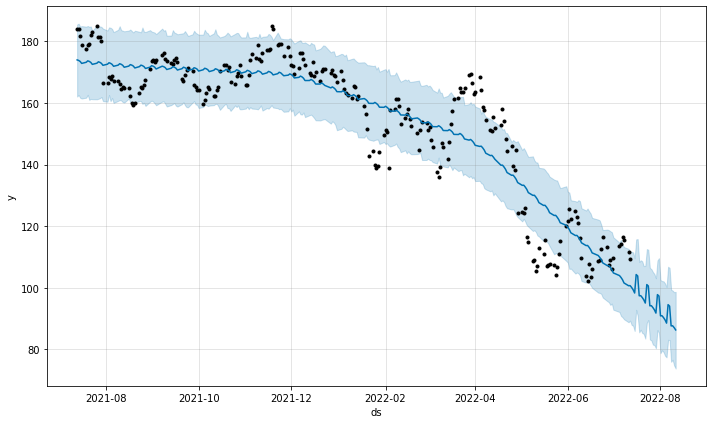

In [ ]:
figure=m.plot(forcast, xlabel='ds', ylabel="y")

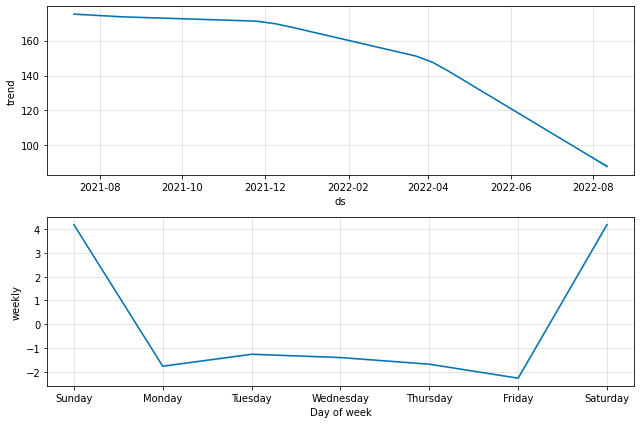

In [ ]:
figure2=m.plot_components(forcast)

In [ ]:
#Download the data
from google.colab import files
forcast.to_csv('forcast.csv')
files.download('forcast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>